In [91]:
import sklearn.decomposition as sk_decomp
from sklearn import linear_model as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score as cvs
from sklearn.svm import l1_min_c
import os
import sys

In [92]:
#os.chdir('..')

In [93]:
#meth_even = pd.read_csv("raw_data\combined_data\combined_4mers_meth_even.tsv", sep="\t")
#meth_odd = pd.read_csv("raw_data\combined_data\combined_4mers_meth_odd.tsv", sep="\t")
#unmeth_even = pd.read_csv("raw_data\combined_data\combined_4mers_unmeth_even.tsv", sep="\t")
#unmeth_odd = pd.read_csv("raw_data\combined_data\combined_4mers_unmeth_odd.tsv", sep="\t")
#unmeth = pd.read_csv("processed_data\combined_data\split_with_background\combined_2mers_unmeth.tsv", sep="\t")

In [94]:
meth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_even_with_background.tsv", sep="\t")
meth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_odd_with_background.tsv", sep="\t")
unmeth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_even_with_background.tsv", sep="\t")
unmeth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_odd_with_background.tsv", sep="\t")

In [95]:
meth_even_healthy = meth_even.loc[meth_even["cancer"]=="Healthy"]
meth_even_unhealthy = meth_even.loc[meth_even["cancer"]!="Healthy"]

meth_odd_healthy = meth_odd.loc[meth_odd["cancer"]=="Healthy"]
meth_odd_unhealthy = meth_odd.loc[meth_odd["cancer"]!="Healthy"]

unmeth_even_healthy = unmeth_even.loc[unmeth_even["cancer"]=="Healthy"]
unmeth_even_unhealthy = unmeth_even.loc[unmeth_even["cancer"]!="Healthy"]

unmeth_odd_healthy = unmeth_odd.loc[unmeth_odd["cancer"]=="Healthy"]
unmeth_odd_unhealthy = unmeth_odd.loc[unmeth_odd["cancer"]!="Healthy"]
#meth = meth.iloc[: , :-1]
#unmeth = unmeth.iloc[: , :-1]

In [96]:
meth_even_healthy=meth_even_healthy.drop(306)
meth_odd_healthy=meth_odd_healthy.drop(306)
unmeth_even_healthy=unmeth_even_healthy.drop(306)
unmeth_odd_healthy=unmeth_odd_healthy.drop(306)

In [97]:
trow = np.shape(meth_even_healthy)[0]
trow

243

In [98]:
train_row = np.shape(meth_even_healthy)[0]//2
train_row

121

In [99]:
utrow = np.shape(meth_even_unhealthy)[0]
utrow

231

In [100]:
frames_healthy = [meth_even_healthy[0:train_row],meth_odd_healthy[0:train_row],unmeth_even_healthy[0:train_row],unmeth_odd_healthy[0:train_row]]
frames_all = [meth_even_healthy[train_row:trow],meth_odd_healthy[train_row:trow],unmeth_even_healthy[train_row:trow],unmeth_odd[train_row:trow],meth_even_unhealthy,meth_odd_unhealthy,unmeth_even_unhealthy,unmeth_odd_unhealthy]
combo_healthy = pd.concat(frames_healthy)
combo_healthy = combo_healthy.iloc[: , :-1]

combo_all = pd.concat(frames_all)
combo_all = combo_all.iloc[: , :-1]

In [101]:
ncomp = np.shape(combo_all)[1]

In [102]:
pca2 = sk_decomp.PCA(ncomp)
combo_healthy = pca2.fit_transform(combo_healthy)

In [103]:
pca = sk_decomp.PCA(n_components=ncomp)
combo_all = pca.fit_transform(combo_all)

In [104]:
y1t = [0]*(train_row)
y2t = [0]*(train_row)
y3t = [1]*(train_row)
y4t = [1]*(train_row)
Ytrain = [y1t,y2t,y3t,y4t]

In [105]:
y1 = [0]*(trow-train_row)
y2 = [0]*(trow-train_row)
y3 = [0]*(trow-train_row)
y4 = [0]*(trow-train_row)
y5 = [1] * (utrow)
y6  = [1] * (utrow)
y7 = [1] * (utrow)
y8 = [1] * (utrow)

Y = [y1,y2,y3,y4,y5,y6,y7,y8]
#Ytrain = [y1,y3]
#Ytest = [y2,y4]

In [106]:
y = []
for i in range(8):
    for j in Y[i]:
        y.append(Y[i][j])

In [107]:
ytrain = []
for i in range(4):
    for j in Ytrain[i]:
        ytrain.append(Ytrain[i][j])

In [108]:
#ytest = []
#for i in range(2):
    #for j in Ytest[i]:
        #ytest.append(Ytest[i][j])

In [109]:
y1p = [0]*(trow)
y2p = [0]*(trow)
y3p = [1]*(trow)
y4p= [1]*(trow)
Yp = [y1p,y2p,y3p,y4p]

In [110]:
#yp = []
#for i in range(8):
    #for j in Yp[i]:
        #yp.append(Yp[i][j])

In [111]:
x1t = combo_healthy[train_row * 0:train_row * 1]
x2t = combo_healthy[train_row * 1:(train_row * 2)]
x3t = combo_healthy[train_row * 2:(train_row * 3)]
x4t = combo_healthy[train_row * 3:(train_row * 4)]
Xtrain = [x1t,x2t,x3t,x4t]
#Xtrain = [x1,x3]
#Xtest = [x2,x4]

In [112]:
testrow = trow-train_row

In [113]:
x1 = combo_all[testrow * 0:testrow * 1]
x2 = combo_all[testrow * 1:(testrow* 2)]
x3 =  combo_all[testrow * 2:(testrow* 3)]
x4 = combo_all[testrow * 3:(testrow* 4)]
new_start = testrow*4
x5 = combo_all[new_start:new_start+utrow]
x6= combo_all[(new_start+utrow):(new_start+utrow*2)]
x7 = combo_all[(new_start+utrow*2):(new_start+utrow*3)]
x8= combo_all[(new_start+utrow*3):(new_start+utrow*4)]
X = [x1,x2,x3,x4,x5,x6,x7,x8]
#Xtrain = [x1,x3]
#Xtest = [x2,x4]

In [114]:
x = []
for i in range(8):
    for j in range(len(X[i])):
        x.append(X[i][j])

In [115]:
xtrain = []
for i in range(4):
    for j in range(len(Xtrain[i])):
        xtrain.append(Xtrain[i][j])
#xtest = []
#for i in range(2):
    #for j in range(len(Xtest[i])):
        #xtest.append(Xtest[i][j])

In [116]:
cs = l1_min_c(xtrain,ytrain, loss = 'log') * np.logspace(0,10,16)

In [117]:
clf = LR(penalty = 'l1',solver='liblinear',tol=1e-6,max_iter=1000,warm_start=True,intercept_scaling=10000.0)

In [118]:
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(xtrain,ytrain)
    coefs_.append(clf.coef_.ravel().copy())
coefs_ = np.array(coefs_)

c:\Users\dwarf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\dwarf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


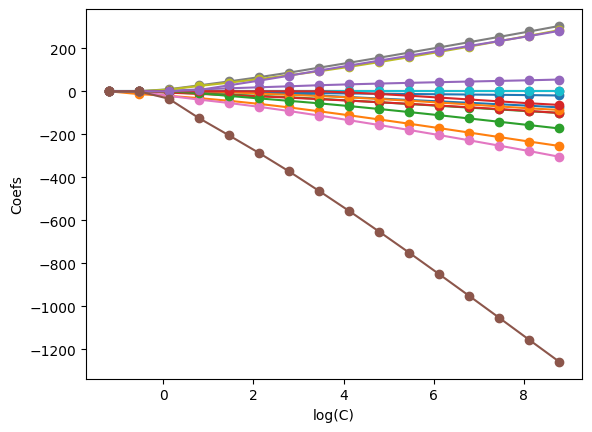

In [119]:
plt.plot(np.log10(cs),coefs_,marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefs")
plt.axis("tight")
plt.savefig('Log_Reg_Fit_Coef_Fig_Raw')
plt.show()

In [120]:
x

[array([-0.03125989,  0.15748796, -0.10910516, -0.00230247, -0.04847527,
        -0.07669968,  0.07038181,  0.02324516,  0.0168878 , -0.00655062,
        -0.0140944 ,  0.02836985, -0.00519797, -0.00592646,  0.01618909,
        -0.0110852 ]),
 array([-4.99584868e-03,  2.97208226e-01, -4.95181219e-02, -5.65540331e-02,
         2.92608565e-02, -8.55967944e-02, -1.19949732e-02, -3.80527700e-02,
        -1.97565446e-02, -7.67183990e-06,  4.17831321e-02,  2.86194428e-03,
         1.42275049e-02, -1.03226776e-02, -2.42425284e-03,  2.22537313e-03]),
 array([-0.11247985,  0.08409527,  0.04447358,  0.07318857, -0.02346084,
        -0.02986584, -0.01966259, -0.02238053,  0.01859869,  0.05634739,
        -0.01743626,  0.04942654,  0.01639011,  0.0191725 , -0.00070456,
         0.00694645]),
 array([-0.0552967 ,  0.1342825 , -0.09296649, -0.07457291,  0.03029093,
        -0.08118325, -0.01492012, -0.02776286, -0.00035754, -0.02642466,
         0.00647203, -0.03885378, -0.00599241,  0.01781199,  0.0

In [121]:
preds = clf.predict_proba(x)

In [122]:
np.set_printoptions(threshold=sys.maxsize)

In [123]:
preds

array([[1.00000000e+000, 2.79944084e-013],
       [1.00000000e+000, 8.41841053e-041],
       [1.00000000e+000, 1.01539637e-022],
       [1.00000000e+000, 2.86013168e-013],
       [1.00000000e+000, 9.81012779e-030],
       [1.00000000e+000, 7.77205188e-015],
       [1.00000000e+000, 3.55070181e-014],
       [1.00000000e+000, 2.96354383e-035],
       [1.00000000e+000, 1.96569897e-038],
       [9.99999972e-001, 2.79822783e-008],
       [1.00000000e+000, 2.25486560e-012],
       [1.00000000e+000, 4.54069613e-039],
       [1.00000000e+000, 9.90918171e-034],
       [1.00000000e+000, 1.89585765e-026],
       [1.00000000e+000, 4.12489351e-050],
       [1.00000000e+000, 1.41869978e-019],
       [1.00000000e+000, 9.99277481e-020],
       [1.00000000e+000, 9.26802104e-036],
       [1.00000000e+000, 5.18488908e-043],
       [1.00000000e+000, 4.15209882e-012],
       [1.00000000e+000, 1.05776631e-029],
       [9.83936099e-001, 1.60639008e-002],
       [9.96930004e-001, 3.06999610e-003],
       [1.0

In [126]:
scores = cvs(clf, x, y)
scores.mean()

0.6642858932912312